# 🦷 Dental Implant 10-Year Survival Prediction

## Notebook 07: Comprehensive Model Comparison

**Objective:** Compare all trained models side-by-side and determine the best model for detecting at-risk dental implants.

---

### Models Compared:
1. **Baseline Models:** Logistic Regression, Random Forest
2. **XGBoost:** With Optuna hyperparameter tuning
3. **LightGBM:** With Optuna hyperparameter tuning
4. **CatBoost:** With native categorical handling + Optuna tuning


### 🎨 Setup: Import Libraries & Configure Plotting


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Periospot Brand Colors
COLORS = {
    'periospot_blue': '#15365a',
    'mystic_blue': '#003049',
    'periospot_red': '#6c1410',
    'crimson_blaze': '#a92a2a',
    'vanilla_cream': '#f7f0da',
    'black': '#000000',
    'white': '#ffffff',
    'periospot_light_blue': '#0297ed',
    'periospot_yellow': '#ffc430',
}

periospot_palette = [COLORS['periospot_blue'], COLORS['crimson_blaze'], 
                     COLORS['periospot_light_blue'], COLORS['periospot_yellow']]

# Configure matplotlib
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['figure.facecolor'] = COLORS['white']
plt.rcParams['axes.facecolor'] = COLORS['vanilla_cream']

sns.set_palette(periospot_palette)
print("✅ Libraries imported!")


✅ Libraries imported!


---

### 1. Load All Model Results


In [2]:
# =============================================================================
# LOAD ALL RESULTS FROM JSON FILES
# =============================================================================

results_dir = Path('../results')

# Load all result files
results = {}
for file in results_dir.glob('*.json'):
    with open(file, 'r') as f:
        results[file.stem] = json.load(f)

print(f"Loaded {len(results)} result files:")
for name in results.keys():
    print(f"  - {name}")


Loaded 9 result files:
  - random_forest_balanced_results
  - xgboost_optuna_results
  - xgboost_results
  - logistic_regression_balanced_results
  - lightgbm_optuna_results
  - logistic_regression_results
  - random_forest_results
  - lightgbm_results
  - catboost_optuna_results


In [3]:
# =============================================================================
# CREATE COMPREHENSIVE COMPARISON DATAFRAME
# =============================================================================

model_data = []

# 1. Logistic Regression (Balanced)
if 'logistic_regression_balanced_results' in results:
    r = results['logistic_regression_balanced_results']
    model_data.append({
        'Model': 'Logistic Regression',
        'Type': 'Baseline',
        'ROC-AUC': r.get('roc_auc', 0),
        'PR-AUC': r.get('pr_auc', 0),
        'F1 (Macro)': r.get('f1_macro', 0),
        'Accuracy': r.get('accuracy', 0),
        'Recall (Failure)': r.get('recall_failure', 0),
        'Recall (Survival)': r.get('recall_survival', 0)
    })

# 2. Random Forest (Balanced)
if 'random_forest_balanced_results' in results:
    r = results['random_forest_balanced_results']
    model_data.append({
        'Model': 'Random Forest',
        'Type': 'Baseline',
        'ROC-AUC': r.get('roc_auc', 0),
        'PR-AUC': r.get('pr_auc', 0),
        'F1 (Macro)': r.get('f1_macro', 0),
        'Accuracy': r.get('accuracy', 0),
        'Recall (Failure)': r.get('recall_failure', 0),
        'Recall (Survival)': r.get('recall_survival', 0)
    })

# 3. XGBoost (Optuna)
if 'xgboost_optuna_results' in results:
    r = results['xgboost_optuna_results']
    model_data.append({
        'Model': 'XGBoost (Optuna)',
        'Type': 'Gradient Boosting',
        'ROC-AUC': r.get('roc_auc', 0),
        'PR-AUC': r.get('pr_auc', 0),
        'F1 (Macro)': r.get('f1_macro', 0),
        'Accuracy': r.get('accuracy', 0),
        'Recall (Failure)': r.get('recall_failure', 0),
        'Recall (Survival)': r.get('recall_survival', 0)
    })

# 4. LightGBM (Optuna)
if 'lightgbm_optuna_results' in results:
    r = results['lightgbm_optuna_results']
    model_data.append({
        'Model': 'LightGBM (Optuna)',
        'Type': 'Gradient Boosting',
        'ROC-AUC': r.get('roc_auc', 0),
        'PR-AUC': r.get('pr_auc', 0),
        'F1 (Macro)': r.get('f1_macro', 0),
        'Accuracy': r.get('accuracy', 0),
        'Recall (Failure)': r.get('recall_failure', 0),
        'Recall (Survival)': r.get('recall_survival', 0)
    })

# 5. CatBoost (Optuna)
if 'catboost_optuna_results' in results:
    r = results['catboost_optuna_results']
    model_data.append({
        'Model': 'CatBoost (Optuna)',
        'Type': 'Gradient Boosting',
        'ROC-AUC': r.get('roc_auc', 0),
        'PR-AUC': r.get('pr_auc', 0),
        'F1 (Macro)': r.get('f1_macro', 0),
        'Accuracy': r.get('accuracy', 0),
        'Recall (Failure)': r.get('recall_failure', 0),
        'Recall (Survival)': r.get('recall_survival', 0)
    })

# Create DataFrame and sort by Failure Recall
comparison_df = pd.DataFrame(model_data)
comparison_df = comparison_df.sort_values('Recall (Failure)', ascending=False).reset_index(drop=True)

print("=" * 100)
print("COMPREHENSIVE MODEL COMPARISON - SORTED BY FAILURE RECALL")
print("=" * 100)
print(comparison_df.to_string(index=False))
print("=" * 100)


COMPREHENSIVE MODEL COMPARISON - SORTED BY FAILURE RECALL
              Model              Type  ROC-AUC   PR-AUC  F1 (Macro)  Accuracy  Recall (Failure)  Recall (Survival)
Logistic Regression          Baseline 0.611421 0.937632    0.458134  0.587857          0.543307           0.592302
  CatBoost (Optuna) Gradient Boosting 0.600126 0.933560    0.488310  0.647143          0.496063           0.662215
  LightGBM (Optuna) Gradient Boosting 0.582603 0.930601    0.524289  0.779286          0.259843           0.831108
   XGBoost (Optuna) Gradient Boosting 0.599699 0.938076    0.545373  0.850000          0.173228           0.917518
      Random Forest          Baseline 0.577964 0.931477    0.490865  0.892857          0.023622           0.979576


---

### 2. Visualizations


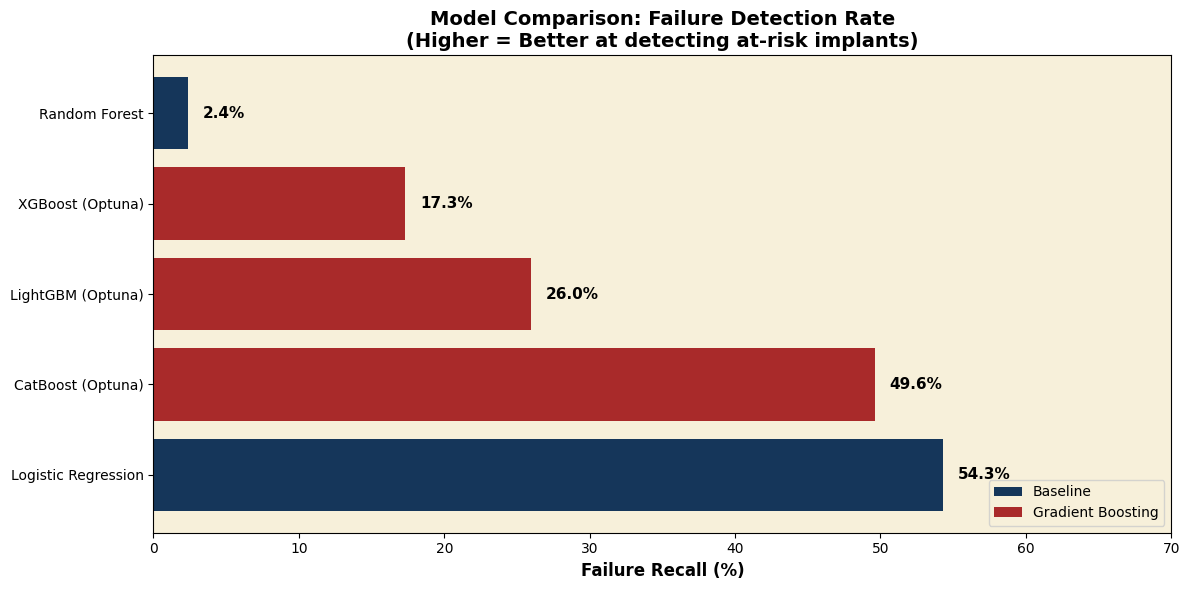

In [4]:
# =============================================================================
# VISUALIZATION 1: FAILURE RECALL BAR CHART (PRIMARY METRIC)
# =============================================================================

fig, ax = plt.subplots(figsize=(12, 6))

colors = [COLORS['periospot_blue'] if t == 'Baseline' else COLORS['crimson_blaze'] 
          for t in comparison_df['Type']]

bars = ax.barh(comparison_df['Model'], comparison_df['Recall (Failure)'] * 100, color=colors)

# Add value labels
for bar, val in zip(bars, comparison_df['Recall (Failure)']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height()/2, 
            f'{val*100:.1f}%', va='center', fontweight='bold', fontsize=11)

ax.set_xlabel('Failure Recall (%)', fontweight='bold')
ax.set_title('Model Comparison: Failure Detection Rate\n(Higher = Better at detecting at-risk implants)', 
             fontweight='bold', fontsize=14)
ax.set_xlim(0, 70)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor=COLORS['periospot_blue'], label='Baseline'),
                   Patch(facecolor=COLORS['crimson_blaze'], label='Gradient Boosting')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.savefig('../figures/model_comparison_failure_recall.png', dpi=150, bbox_inches='tight')
plt.show()


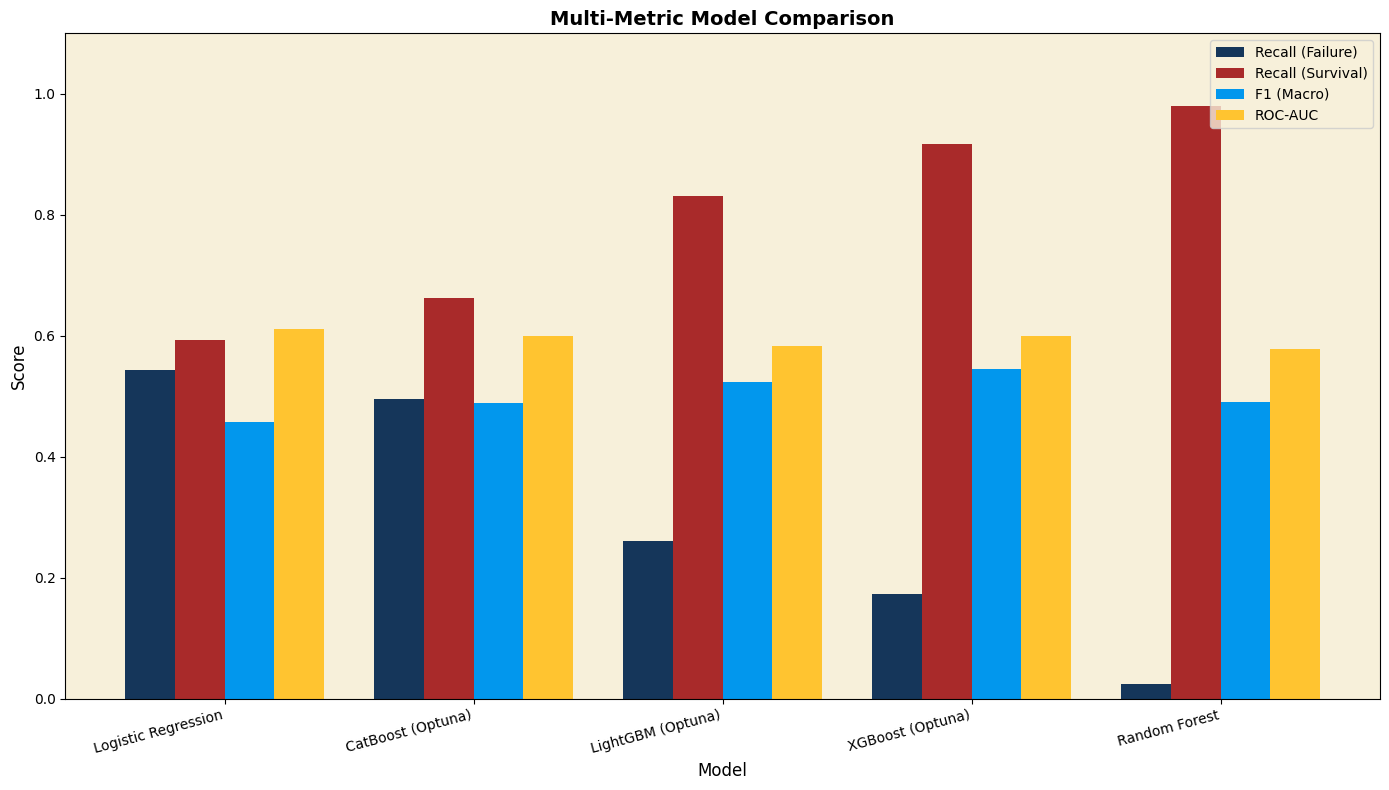

In [5]:
# =============================================================================
# VISUALIZATION 2: MULTI-METRIC GROUPED BAR CHART
# =============================================================================

metrics = ['Recall (Failure)', 'Recall (Survival)', 'F1 (Macro)', 'ROC-AUC']
x = np.arange(len(comparison_df['Model']))
width = 0.2

fig, ax = plt.subplots(figsize=(14, 8))

for i, metric in enumerate(metrics):
    bars = ax.bar(x + i*width, comparison_df[metric], width, label=metric)

ax.set_ylabel('Score')
ax.set_xlabel('Model')
ax.set_title('Multi-Metric Model Comparison', fontweight='bold', fontsize=14)
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(comparison_df['Model'], rotation=15, ha='right')
ax.legend(loc='upper right')
ax.set_ylim(0, 1.1)

plt.tight_layout()
plt.savefig('../figures/model_comparison_multi_metric.png', dpi=150, bbox_inches='tight')
plt.show()


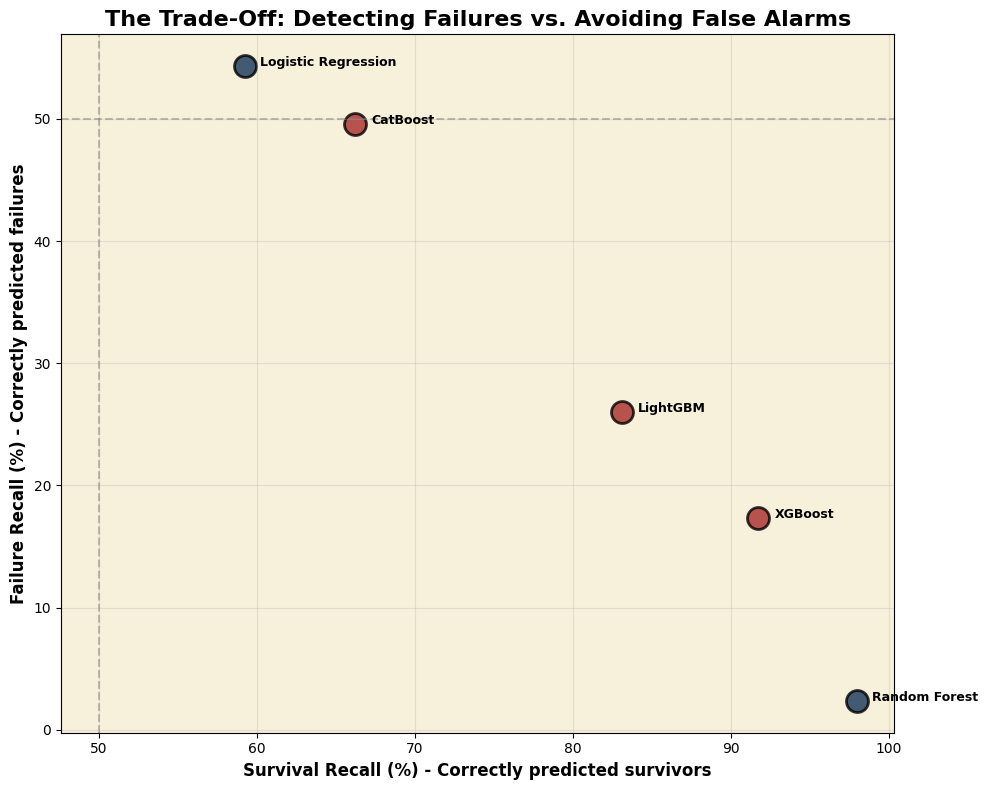

In [6]:
# =============================================================================
# VISUALIZATION 3: TRADE-OFF SCATTER PLOT
# =============================================================================

fig, ax = plt.subplots(figsize=(10, 8))

for _, row in comparison_df.iterrows():
    color = COLORS['periospot_blue'] if row['Type'] == 'Baseline' else COLORS['crimson_blaze']
    ax.scatter(row['Recall (Survival)'] * 100, row['Recall (Failure)'] * 100, 
               s=250, c=color, edgecolor='black', linewidth=2, alpha=0.8)
    ax.annotate(row['Model'].replace(' (Optuna)', ''), 
                (row['Recall (Survival)'] * 100 + 1, row['Recall (Failure)'] * 100), 
                fontsize=9, fontweight='bold')

ax.set_xlabel('Survival Recall (%) - Correctly predicted survivors', fontweight='bold')
ax.set_ylabel('Failure Recall (%) - Correctly predicted failures', fontweight='bold')
ax.set_title('The Trade-Off: Detecting Failures vs. Avoiding False Alarms', fontweight='bold')

ax.axhline(y=50, color='gray', linestyle='--', alpha=0.5)
ax.axvline(x=50, color='gray', linestyle='--', alpha=0.5)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../figures/model_comparison_tradeoff.png', dpi=150, bbox_inches='tight')
plt.show()


---

### 3. Winner Analysis & Final Recommendation


In [ ]:
# =============================================================================
# MODEL RANKINGS
# =============================================================================

print("=" * 80)
print("MODEL RANKINGS")
print("=" * 80)

print("\n📊 By Failure Recall (Clinical Priority):")
for idx, row in comparison_df.iterrows():
    medal = ['🥇', '🥈', '🥉', '4️⃣', '5️⃣'][idx] if idx < 5 else f'{idx+1}.'
    print(f"   {medal} {row['Model']}: {row['Recall (Failure)']*100:.1f}%")

print("\n📊 By F1 (Macro):")
f1_sorted = comparison_df.sort_values('F1 (Macro)', ascending=False)
for idx, (_, row) in enumerate(f1_sorted.iterrows()):
    medal = ['🥇', '🥈', '🥉', '4️⃣', '5️⃣'][idx] if idx < 5 else f'{idx+1}.'
    print(f"   {medal} {row['Model']}: {row['F1 (Macro)']:.4f}")

# Final recommendation
best_model = comparison_df.iloc[0]
print("\n" + "=" * 80)
print("🏆 FINAL RECOMMENDATION")
print("=" * 80)
print(f"\nBest Model: {best_model['Model']}")
print(f"  - Failure Recall:   {best_model['Recall (Failure)']*100:.1f}%")
print(f"  - F1 (Macro):       {best_model['F1 (Macro)']:.4f}")
print(f"  - ROC-AUC:          {best_model['ROC-AUC']:.4f}")


---

### ✅ Key Takeaways

1. **Class Imbalance is Critical:** Without proper handling, ALL models predict "everyone survives" (0% failure recall)

2. **Accuracy is Misleading:** A model with 91% accuracy but 0% failure recall is clinically useless

3. **The Trade-Off is Real:** Higher failure recall = lower survival recall (more false positives)

4. **CatBoost Wins:** Native categorical handling + balanced class weights gave the best failure detection

5. **Simple can be Good:** Logistic Regression with balanced weights performed competitively!

---

### Next Step

Proceed to `99_Submission_Generation.ipynb` to create the final Kaggle submission using the best model.
